In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (12,6)

## Linear deterministic trend

The process is given by

$$
Y_t = b + w_1t + \epsilon
$$

where $\epsilon$ is idd white noise. For the expectation and variance it holds that

$$
E(Y_t) = b + w_1t + E(\epsilon) = b+w_1t
$$

$$
V(Y_t) = \epsilon
$$

We can estimate $b$ and $w_1$ via linear regression. Forecasts can be produced by

$$
\hat{y}_{T+1} = \hat{b} + \hat{w}_1(T+1)
$$

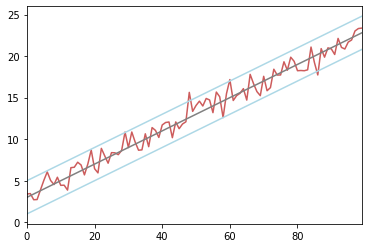

In [2]:
def make_linear(b, w1, T):
    epsilon = np.random.normal(size=T)
    return b + w1*pd.Series(range(T)) + epsilon

b = 3
w1 = 0.2
T = 100

trend = b + w1*pd.Series(range(T))
var = pd.Series([1]*T)

ax = make_linear(b, w1, T).plot(c='indianred')

ax.plot(trend + 2*var**0.5, c='lightblue')
ax.plot(trend - 2*var**0.5, c='lightblue')
ax.plot(trend, c='gray')
plt.show()

# Autoregressive processes

An autoregressive process - AR(p) - is a stochastic process of the form:

$$
y_t = b + \sum_{j=1}^{P}w_{j}y_{t-j} + \epsilon_t
$$

where $b$ is the bias, $w_j$ are the weights of the model and $\epsilon$ is some iid (e.g. Gaussian) noise. For the noise it holds that $E(\epsilon_t) = E(\epsilon) = 0$ and $V(\epsilon_t) = V(\epsilon) = \sigma^2$. E.g. expectation and variance are constant and time invariant.


For the case of $P=1$ we can write the process as:

$$
y_t = b + w_1y_{t-1} + \epsilon_t
$$

Lets model some $AR(1)$ processes!



In [3]:
def make_ar(b, w1, w2, T):
    epsilon = np.random.normal(size=T)
    y = np.zeros(T)
    for t in range(1, T):
        y[t] = b + w1*y[t-1] + w2*y[t-2] + epsilon[t]
    return pd.Series(y)

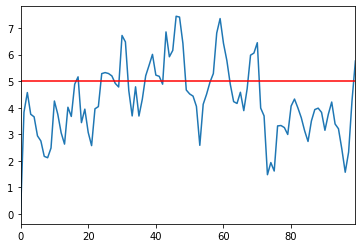

In [6]:
b = 1
w1 = 0.8
w2 = 0
mu = b/(1-w1-w2)
T = 100

fig, ax = plt.subplots(1)

for s in range(1):
    make_ar(b, w1, w2, T).plot(ax=ax)
    plt.plot(range(T), [mu]*T, c='r')

## Special case I: White noise

The process is given by 

$$
Y_t = \epsilon
$$

where $\epsilon$ is a idd (Gaussian) random variable. This is a special case of the $AR(1)$ model with $b=w_1=0$.

In [ ]:
b = 0
w1 = 0
w2 = 0
mu = b/(1-w1)
T = 1000

plt.plot(make_ar(b, w1, w2, T))
plt.plot(range(T), [0]*T, c='r')

## Special Case II: Random walk (with drift)

The process is given by 

$$
y_t = b + y_{t-1} + \epsilon_t
$$

It is just another special case of the $AR(1)$ model with $w_1 = 1$.

For the expectation and variance it holds that

$$
E(Y_t) = b + E(Y_{t-1}) + E(\epsilon_t) = b + b + E(Y_{t-2}) + 0 = \dots = tb
$$

$$
V(Y_t) = V(Y_{t-1}) + \sigma^2 = V(Y_{t-2}) + \sigma^2 + \sigma^2 = \dots = t\sigma^2
$$

First differences yields:

$$
Y_t - Y_{t-1} = b + \epsilon_t
$$

So we can estimate b by taking the average over the first differences:

$$
\hat{y}_{T+1} = \hat{b} + Y_{T}
$$

where $\hat{b} = \frac{1}{T}\sum_{t=1}^{T} y_t - y_{t-1}$.

Allthough the random walk with drift looks quite similar to the linear trend model, these two models are completely different!

The random walk process is characterized by long periods of up or downward trends with sudden unpredictible changes. The naive forecast method corresponds to the best estimator we can get for a random walk withou drift. The drift method corresponds to the best estimator for a random walk with drift.



In [ ]:
b = 0.8
w1 = 1
w2 = 0
T = 100

trend = pd.Series(np.arange(T)*b)
var = pd.Series(np.arange(T))

ax = make_ar(b, w1, w2, T).plot(c='indianred')

ax.plot(trend + 2*var**0.5, c='lightblue')
ax.plot(trend - 2*var**0.5, c='lightblue')
ax.plot(trend, c='grey')

In [ ]:
# Differencing a random walk returns a white noise process
make_ar(0, 1, 0, 1000).diff().plot()

## Special Case III: Explosive (exponential) process

This process is given by an AR(1) process for which $w_1 > 1$:

In [ ]:
b = 0
w1 = 0.8
w2 = 0
mu = b/(1-w1)
T = 1000

make_ar(b, w1, w2, T).plot()

For AR and ARIMA models to work we need stationary and weakly dependent time series.

# Stationarity
 
Stationarity means that the properties of the series do not depend on the time at which the series is observed. In other words, a time series is stationary if the expectation and variance do not change over time. In the long run, a stationary time series is not predictible.

We can transform a non stationary time series into a stationary process by:

- taking first (or higher order) differences to stabilize the mean (difference stationary)
- transformations (e.g. log) can help to stabilize the variance
- removing trend and seasonality (trend stationary)

By checking the ACF (autocorrelation) function of the time series for suspicously high autocorrelation that dies out slowly we can test for stationarity:

# Weak Dependence

"A stationary time series process [...] is said to be weakly dependent if
$x_t$ and $x_{t+h}$ are "almost independent" as h" goes to infinity.
"In other words, as the variables get farther apart in time, the correlation
between them becomes smaller and smaller." - 
Introductory Econometrics - Wooldridge, J.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
b = 0
w1 = 0.8
w2 = 0
mu = b/(1-w1)
T = 1000

y = make_ar(b, w1, w2, T)
print(plot_acf(y, lags=100))

## Order of the AR(p) process

How do we determine the order of the AR(p) process?

The Box-Jenkins Method suggests to look at the Partial Autocorrelation (PAC).

In [ ]:
b = 0
w1 = 0.5
w2 = 0.2
mu = b/(1-w1-w2)
T = 1000

y = make_ar(b, w1, w2, T)
print(plot_pacf(y, lags=100))

## Split y into train and test

## How do we fit the model?

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

## Compare that to a linear regression

## Make predictions

In [ ]:
pred = res.predict()

In [ ]:
# In sample prediction

In [ ]:
# Out of sample forecasting

In [ ]:
plt.plot(y_test)
plt.plot(forecast)

In [ ]:
# Plot

## Impement a walk-forward forecast

In [ ]:
# Save parameters

In [ ]:
# Test on one-step ahead forecast

In [ ]:
# create an empty list of predictions
predictions = []

# create a loop to predict the value for every timestep in y_test

In [ ]:
# Plot everything

In [ ]:
# Evaluate your forecast
from sklearn.metrics import mean_squared_error

# Try that on the flights data

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
%matplotlib inline

df = sns.load_dataset('flights')
df.head()

In [ ]:
df['date'] = df['year'].astype(str) + '-' + df['month'].astype(str)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.head()

In [ ]:
df['passengers'].plot()

In [ ]:
# Split it into train and test
y_train_flights = df[:'1958'].passengers
y_test_flights = df['1959':].passengers

len(y_train_flights), len(y_test_flights)

## Look at the plots

In [ ]:
print(plot_acf(y_train_flights, lags=100))

In [ ]:
print(plot_pacf(y_train_flights, lags=10))

In [ ]:
# Fit the model
ar_flights = AutoReg(y_train_flights, lags=2, trend='ct')
res_flights = ar_flights.fit()
print(res_flights.summary())

In [ ]:
## construct walk-forward forecast

# create an empty list of predictions
predictions = []

# create a loop to predict the value for every timestep in y_test
for i in range(len(y_train_flights), len(df)):
    predictions.append(parameters[0] + sum(df.passengers[i-2:i].values * parameters[:0:-1].values))

In [ ]:
# Plot the three plots
plt.plot(df.passengers)
plt.plot(res_flights.predict())
plt.plot(y_test_flights.index, predictions)

In [ ]:
# Do a automatic decomposition
from statsmodels.tsa.seasonal import STL

decompose = STL(y_train_flights, period=13)
decompose = decompose.fit()
print(decompose.plot())

In [ ]:
# Take the residuals for the analysis
series = decompose.resid
print(plot_acf(series))

In [ ]:
print(plot_pacf(series))

In [ ]:
# Fit the model on the residuals
series_model = AutoReg(series, lags=2)
res_fl = series_model.fit()
print(res_fl.summary())

In [ ]:
# reconstruct the values
pr = res_fl.fittedvalues + decompose.seasonal + decompose.trend

In [ ]:
# Plot everything together
plt.plot(pr, label='stationary_pred')
plt.plot(y_train_flights, label='true_value')
plt.plot(res_flights.predict(), label='non-stationary')
plt.legend()

In [ ]:
# Compare the mean_squared_error of the two approaches
mean_squared_error(y_train_flights[4:], pr[4:]), mean_squared_error(y_train_flights[4:], res_flights.predict()[4:])

## Black-box model?

Use prophet